# Sentiment Analysis using Neural Network

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb

In [87]:
((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000)

In [88]:
type(XT)

numpy.ndarray

In [89]:
len(XT)   #training set

25000

In [90]:
len(Xt)  # testing set

25000

In [91]:
# 1st review
print(XT[0])    # each review is mapped to some number

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [92]:
words_idx=imdb.get_word_index()

In [93]:
#print(words_idx.items())

In [94]:
idx_words=dict([value,key] for (key,value) in words_idx.items())

In [95]:
actual_review=' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [96]:
actual_review # after stopwords removal

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Count Vectorizer

In [97]:
def sentence_vectorizer(sentences,dim=10000):
    outputs=np.zeros((len(sentences),dim))
    for i,idx in enumerate(sentences):
        outputs[i,idx]=1
    return outputs
  

In [98]:
X_train=sentence_vectorizer(XT)
X_test=sentence_vectorizer(Xt)

In [99]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [100]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [101]:
Y_train=np.asarray(YT).astype('float32')
Y_test=np.asarray(Yt).astype('float32')

# Network Building

In [102]:
from keras import models
from keras.layers import Dense

In [103]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation='sigmoid'))


In [104]:
model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training and validation

In [106]:
x_val=X_train[:5000]  # validation set    
x_train_new=X_train[5000:]
y_val = Y_train [: 5000 ]  
y_train_new=Y_train[5000:]

In [107]:
#his=model.fit(x_train_new,y_train_new,batch_size=512,epochs=20,validation_data=(x_val,y_val))
his=model.fit(x_train_new,y_train_new,batch_size=512,epochs=4,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 3s 142us/step - loss: 0.4715 - acc: 0.8055 - val_loss: 0.3695 - val_acc: 0.8564
Epoch 2/4
20000/20000 [==============================] - 2s 114us/step - loss: 0.2723 - acc: 0.9048 - val_loss: 0.2941 - val_acc: 0.8864
Epoch 3/4
20000/20000 [==============================] - 2s 111us/step - loss: 0.2027 - acc: 0.9307 - val_loss: 0.2699 - val_acc: 0.8908
Epoch 4/4
20000/20000 [==============================] - 2s 112us/step - loss: 0.1671 - acc: 0.9415 - val_loss: 0.2799 - val_acc: 0.8900


In [108]:
history=his.history
history

{'val_loss': [0.3695066014289856,
  0.2941474971294403,
  0.2699494197845459,
  0.2798734401702881],
 'val_acc': [0.8564000003814697,
  0.8863999998092651,
  0.8907999999046325,
  0.8899999994277954],
 'loss': [0.47150034284591674,
  0.2722866192340851,
  0.20270895380973816,
  0.16706695756912232],
 'acc': [0.80555, 0.90475, 0.9307, 0.94145]}

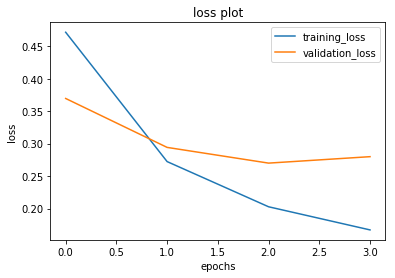

In [109]:
plt.plot(history['loss'],label='training_loss')
plt.plot(history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("loss plot")
plt.show()

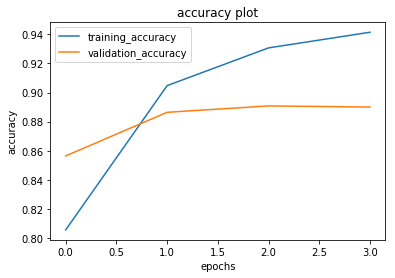

In [110]:
plt.plot(history['acc'],label='training_accuracy')
plt.plot(history['val_acc'],label='validation_accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy plot")
plt.legend()
plt.show()

## Accuracy 

In [111]:
# test set accuracy
model.evaluate(X_test,Y_test)[1]   # for accuracy

25000/25000 [==============================] - 3s 127us/step


0.8792

In [112]:
# training set accuracy
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 3s 120us/step


0.9454

In [113]:
pred=model.predict(X_test)    # we can covert these probabilities to 0 and 1

In [114]:
pred

array([[0.19951949],
       [0.9990091 ],
       [0.4391804 ],
       ...,
       [0.13603887],
       [0.0541642 ],
       [0.43364245]], dtype=float32)

In [115]:
m=pred.shape[0]
new_pred=[]
for i in range(m):
    if pred[i]>0.5:
        new_pred.append(1)
    else:
        new_pred.append(0)
        
    

In [116]:
#print(new_pred)


In [117]:
type(Y_test)

numpy.ndarray

In [125]:
print(new_pred)

[0 1 0 ... 0 0 0]


In [124]:
new_pred=np.array(new_pred)
acc=np.sum((new_pred==Y_test))/float(m)
acc

0.8792